<a href="https://colab.research.google.com/github/OnkarMulay10/EEG_Epilepsy/blob/main/EEG_epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer

In [2]:
d=pd.read_csv('data.csv')
print(d.shape)

(11500, 180)


In [28]:
d.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11460,11461,11462,11463,11464,11465,11466,11467,11468,11469,11470,11471,11472,11473,11474,11475,11476,11477,11478,11479,11480,11481,11482,11483,11484,11485,11486,11487,11488,11489,11490,11491,11492,11493,11494,11495,11496,11497,11498,11499
Index,X21.V1.791,X15.V1.924,X8.V1.1,X16.V1.60,X20.V1.54,X14.V1.56,X3.V1.191,X11.V1.273,X19.V1.874,X3.V1.491,X3.V1.6,X21.V1.724,X7.V1.162,X1.V1.211,X1.V1.615,X22.V1.242,X1.V1.863,X9.V1.302,X7.V1.541,X9.V1.915,X23.V1.964,X1.V1.614,X11.V1.134,X18.V1.544,X19.V1.294,X21.V1.802,X2.V1.72,X3.V1.744,X12.V1.733,X8.V1.614,X20.V1.374,X2.V1.514,X8.V1.451,X18.V1.40,X5.V1.8,X10.V1.492,X5.V1.741,X5.V1.202,X23.V1.74,X23.V1.332,...,X4.V1.333,X22.V13,X20.V1.902,X10.V1.273,X16.V1.851,X19.V1.13,X4.V1.86,X20.V1.57,X6.V1.904,X1.V1.46,X17.V1.232,X21.V1.334,X5.V1.332,X4.V1.173,X8.V1.88,X7.V1.462,X22.V1.984,X10.V1.421,X3.V1.554,X16.V1.353,X13.V1.26,X8.V1.444,X8.V1.904,X1.V1.902,X13.V1.583,X7.V1.81,X15.V1.601,X17.V1.874,X20.V1.494,X7.V1.51,X14.V1.404,X20.V1.883,X13.V1.624,X23.V1.714,X21.V1.762,X22.V1.114,X19.V1.354,X8.V1.28,X10.V1.932,X16.V1.210
X1,0.00979823,0.005773,-0.00333229,-0.00855676,-0.00163369,0.00730218,-0.00562257,0.000152742,-0.0124479,0.00187441,-0.000858369,-0.0037996,0.00694497,0.00147348,-0.00403158,-0.016129,0.0063117,0.00174723,-0.00435866,0.000374462,0.00484508,-0.00420463,-0.0138955,-0.000196589,0.00992402,-0.00333611,-0.00222866,-0.00997097,-0.00311915,-0.00017671,-0.00137004,-0.00534824,-0.0140304,-0.003663,0.00127134,0.00631623,0.0177637,-0.0245583,-0.011694,0.00540378,...,0.00139958,0.00252653,0.00805506,-0.00909592,-0.00443248,0.0113734,-0.00605214,0.00234388,0.00416667,0.000575516,-0.00534206,-0.00431634,-0.00603244,-0.0082994,-0.00510569,-0.00696436,-0.00717135,0.00629921,0.0251055,0.00825676,0.00508707,-0.00372085,-0.00182306,0.00043508,-0.00302979,-0.00395662,0.000748743,0.00403276,0.00862765,0.0144998,-0.000292006,0.00814371,-0.00161271,-0.0152313,-0.00300972,-0.00373514,-0.00209569,0.00217899,-0.00369994,0.00401107
X2,0.0137901,0.00571317,-0.00406123,-0.00823079,-0.0117989,0.00371747,-0.000920057,-0.000305483,-0.0110151,0.00351453,0.00257511,-0.00523298,0.00369895,0.00117878,-0.00251974,-0.0158901,0.00663538,0.000776548,-0.00103778,0.00224677,0.00532958,-0.0047302,-0.00994789,0.00196589,0.00548917,-0.00312761,-0.00423446,-0.0111733,0.00155958,0.00318077,-0.00044195,-0.00559135,-0.0128772,-0.00424908,-0.00036324,0.00421082,0.0183981,-0.024735,-0.0110443,0.00495347,...,0,0.000252653,0.00907171,-0.00882029,-0.0053823,0.0134413,-0.00209497,0.0025113,0.00387168,0.000904382,-0.00284336,-0.00645435,-0.00702136,-0.0104134,-0.00490146,-0.00440393,-0.00726926,0.00809899,0.0261053,0.0090558,0.00645666,-0.00436984,6.02664e-05,0.00186463,-0.00201986,-0.00117233,-0.00299497,0.00440311,0.0132161,0.013372,-0.000849471,0.0109381,-0.00316569,-0.0153433,-0.00123476,-0.00373514,-0.00049048,0.000933852,-0.00231246,0.00567082
X3,0.0166207,0.00532432,-0.0048943,-0.00782332,-0.0177891,0.0023898,0.00531589,-0.00122193,-0.00962701,0.00304592,0.00480687,-0.00637059,0,0,-0.000839913,-0.0149343,0.00663538,-0.000970685,0.000207555,0.00477439,0.00580227,-0.00402943,-0.00615822,0.00383349,0.0014727,-0.00396163,-0.00590595,-0.0110267,0.00634227,0.00618484,0.000220975,-0.0057129,-0.0109552,-0.0021978,-0.00345078,0.0039301,0.0126883,-0.0236749,-0.00990742,0.00450315,...,-0.00209937,-0.000252653,0.00735122,-0.00923374,-0.00728194,0.0155092,-0.00162942,0.0041855,0.0034292,0.00164433,0.00112011,-0.00843099,-0.00761472,-0.0101785,-0.00643317,-0.00245801,-0.00739163,0.00584927,0.0222728,0.00998801,0.00606535,-0.00497555,0.00156693,0.000994468,-0.000841609,-0.00322392,-0.00492031,0.00497922,0.014541,0.0111165,-0.00160603,0.0126148,-0.00501732,-0.0154553,-0.00100324,-0.00390492,0.0012485,-0.00202335,-0.000832485,0.00788382
X4,0.0161852,0.00495042,-0.00385296,-0.00749735,-0.0185152,0.00212427,0.0113474,-0.00168016,-

##Data Transformation and Normalization


##Balanced Dataset

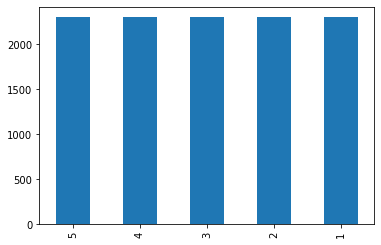

In [4]:
d['y'].value_counts().plot(kind='bar');

In [15]:
d.rename(columns={ d.columns[0]: "Index" }, inplace = True)
#d = d.set_index(d['Index'])
#d.drop('Index',axis='columns',inplace=True)

##Saumya Dataset


In [6]:
ds=d

##Features

In [7]:
y=d.y
d.drop(columns='y')
d.iloc[:,1:] = Normalizer(norm='l1').fit_transform(d.iloc[:,1:])
d['y']=y

In [8]:
d['y']=d['y'].astype(int)
d_e=d[d["y"]==1]
d_ne=d[d["y"]!=1]

In [9]:
d_e.shape

(2300, 180)

(array([[ 0.,  0., 16., ...,  0.,  0.,  0.],
        [ 0.,  0.,  8., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.]]),
 array([-0.04978339, -0.03779219, -0.02580099, -0.01380979, -0.00181859,
         0.01017261,  0.02216381,  0.03415501,  0.04614621,  0.05813741,
         0.07012861]),
 <a list of 2300 Lists of Patches objects>)

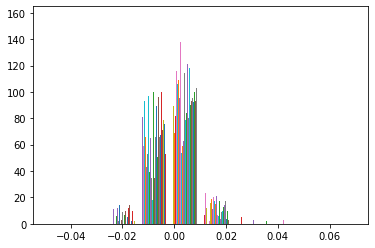

In [10]:
matrix=d_e.iloc[:,1:179]
plt.hist(matrix)

(array([[0., 0., 3., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.05184219, -0.04054031, -0.02923842, -0.01793654, -0.00663466,
         0.00466723,  0.01596911,  0.027271  ,  0.03857288,  0.04987476,
         0.06117665]),
 <a list of 9200 Lists of Patches objects>)

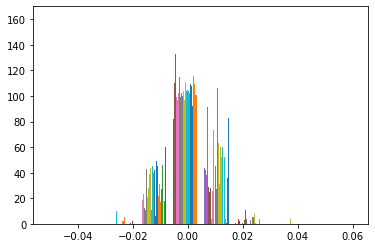

In [11]:
matrix2=d_ne.iloc[:,1:179]
plt.hist(matrix2)

In [18]:
d.drop('y',axis='columns',inplace=True)

In [17]:
df=pd.DataFrame()
df['skew']=d.skew(axis = 1, skipna = True) 
df['mean']=d.mean(axis = 1, skipna = True)
df['kurtosis']=d.kurtosis(axis = 1, skipna = True) 
df['variance']=d.var(axis = 1, skipna = True) 

In [25]:
df['min']=d.min(axis = 1, skipna = True) 
df['max']=d.max(axis = 1, skipna = True) 
#df['range']=d.range(axis = 1, skipna = True) 
df['mad']=d.iloc[:,1:179].mad(axis=1)
df['y']=y
d=d.T

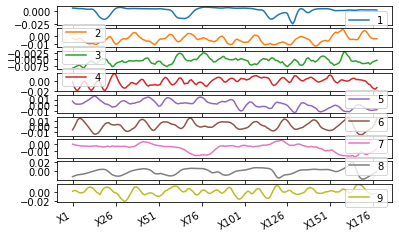

In [42]:
d.iloc[1:1150,1:10].plot(subplots=True)
plt.show()

In [ ]:
for key,eeg in d.iteritems:
  a=eeg.plt.plot()
  fig.savefig(key)

In [45]:
import os
my_path = os.path.abspath()
figs='figs'
figs_REst='figs_rest'
#os.mkdir(figs)
os.mkdir(figs_REst)

'/content'